In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime
import plotly.graph_objects as go
from scipy.stats import linregress
import warnings
import mplfinance as mpf

In [5]:
btc_day = pd.read_csv(r"C:\Users\Sahil\Desktop\IITP\VScode\Bitcoin\BTCUSD_day.csv")
btc_day.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,2020-04-10,BTCUSD,7315.25,7315.25,7315.25,7315.25,0.00,0.00
1,2020-04-09,BTCUSD,7369.60,7378.85,7115.04,7315.25,2237.13,16310014.53
2,2020-04-08,BTCUSD,7201.81,7432.23,7152.80,7369.60,2483.60,18138080.27
3,2020-04-07,BTCUSD,7336.96,7468.42,7078.00,7201.81,2333.34,17047120.32
4,2020-04-06,BTCUSD,6775.21,7369.76,6771.01,7336.96,3727.47,26533750.17


In [3]:
btc_min = pd.read_csv(r"C:\Users\Sahil\Desktop\IITP\VScode\Bitcoin\BTCUSD_1min.csv", index_col='Date', parse_dates=True)
btc_min.head()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2020-04-09 00:00:00,1586390400000,BTCUSD,7369.60,7369.60,7348.47,7350.41,7.733528
2020-04-08 23:59:00,1586390340000,BTCUSD,7364.37,7369.60,7364.37,7369.60,1.310954
2020-04-08 23:58:00,1586390280000,BTCUSD,7360.89,7367.18,7360.89,7364.37,1.018774
2020-04-08 23:57:00,1586390220000,BTCUSD,7357.62,7366.12,7357.62,7360.89,0.026251
2020-04-08 23:56:00,1586390160000,BTCUSD,7370.71,7370.71,7357.62,7357.62,0.444867


In [4]:
btc_hr = pd.read_csv(r"C:\Users\Sahil\Desktop\IITP\VScode\Bitcoin\BTCUSD_1hr.csv")
btc_hr.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7338.23,7338.23,7.788915
1,1586386800000,2020-04-08 23:00:00,BTCUSD,7367.28,7398.92,7348.47,7369.60,66.558293
2,1586383200000,2020-04-08 22:00:00,BTCUSD,7337.19,7390.25,7322.87,7367.28,88.486108
3,1586379600000,2020-04-08 21:00:00,BTCUSD,7327.70,7370.00,7311.33,7337.19,35.551553
4,1586376000000,2020-04-08 20:00:00,BTCUSD,7320.11,7375.72,7313.66,7327.70,153.655811


In [29]:
print('Shape of btc_hr dataset is: ',btc_hr.shape)
print('Shape of btc_min dataset is: ',btc_min.shape)
print('Shape of btc_day dataset is: ',btc_day.shape)

Shape of btc_hr dataset is:  (39465, 8)
Shape of btc_min dataset is:  (2283519, 7)
Shape of btc_day dataset is:  (1647, 8)


In [30]:
btc_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1647 non-null   object 
 1   Symbol      1647 non-null   object 
 2   Open        1647 non-null   float64
 3   High        1647 non-null   float64
 4   Low         1647 non-null   float64
 5   Close       1647 non-null   float64
 6   Volume BTC  1647 non-null   float64
 7   Volume USD  1647 non-null   float64
dtypes: float64(6), object(2)
memory usage: 103.1+ KB


In [6]:
btc_day['Date'] = pd.to_datetime(btc_day['Date'])

In [7]:
btc_day.isnull().sum()

Date          0
Symbol        0
Open          0
High          0
Low           0
Close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [8]:
btc_day.describe()

,Open,High,Low,Close,Volume BTC,Volume USD
count,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1.647000e+03
mean,4823.493224,4971.083673,4656.335337,4827.596515,3789.357365,2.129125e+07
std,3937.740533,4078.527350,3760.335160,3936.503969,4436.695998,3.694968e+07
min,242.500000,245.000000,236.000000,243.950000,0.000000,0.000000e+00
25%,741.975000,751.830000,732.030000,742.260000,1028.940000,1.659287e+06
50%,4147.100000,4295.090000,4000.000000,4154.840000,2263.370000,9.395394e+06
75%,7920.510000,8139.750000,7630.445000,7920.510000,4918.785000,2.464551e+07
max,19499.990000,19999.000000,18870.000000,19499.990000,49229.150000,5.606539e+08


In [9]:
btc_day_copy = btc_day.copy()
btc_day_copy.drop(btc_day_copy[btc_day_copy['Volume BTC'] == 0].index, inplace = True)
btc_day_copy.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
1,2020-04-09,BTCUSD,7369.60,7378.85,7115.04,7315.25,2237.13,16310014.53
2,2020-04-08,BTCUSD,7201.81,7432.23,7152.80,7369.60,2483.60,18138080.27
3,2020-04-07,BTCUSD,7336.96,7468.42,7078.00,7201.81,2333.34,17047120.32
4,2020-04-06,BTCUSD,6775.21,7369.76,6771.01,7336.96,3727.47,26533750.17
5,2020-04-05,BTCUSD,6870.20,6907.90,6678.60,6775.21,1275.49,8662210.80


In [10]:
btc_day_copy.shape

(1643, 8)

In [11]:
#creating return series
btc_day_copy['Return'] = btc_day_copy['Close'].pct_change()*100

In [12]:
btc_day_copy.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Return
1,2020-04-09,BTCUSD,7369.60,7378.85,7115.04,7315.25,2237.13,16310014.53,NaN
2,2020-04-08,BTCUSD,7201.81,7432.23,7152.80,7369.60,2483.60,18138080.27,0.742968
3,2020-04-07,BTCUSD,7336.96,7468.42,7078.00,7201.81,2333.34,17047120.32,-2.276786
4,2020-04-06,BTCUSD,6775.21,7369.76,6771.01,7336.96,3727.47,26533750.17,1.876612
5,2020-04-05,BTCUSD,6870.20,6907.90,6678.60,6775.21,1275.49,8662210.80,-7.656441


In [13]:
np.mean(btc_day_copy['Return'])

-0.11739233132494797

# Visualization

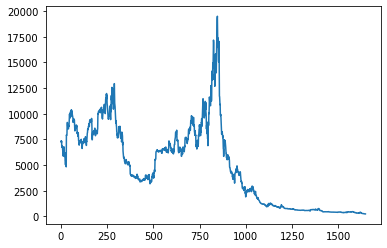

In [15]:
#plotting closing prices
ax1 = btc_day_copy['Close'].plot(style = ['-'])

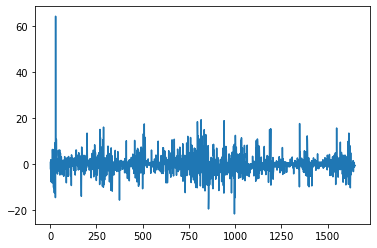

In [14]:
btc_day_copy.set_index('Date')
ax2 = btc_day_copy['Return'].plot(style = ['-'])

<AxesSubplot:>

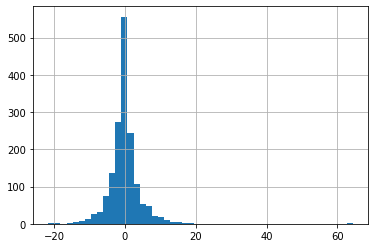

In [16]:
btc_day_copy['Return'].hist(bins=50)

<AxesSubplot:>

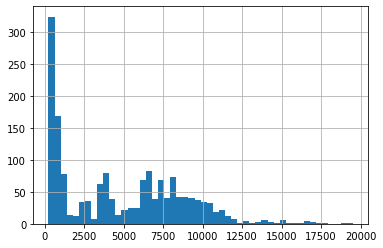

In [17]:
btc_day_copy['Close'].hist(bins=50)

<AxesSubplot:ylabel='Density'>

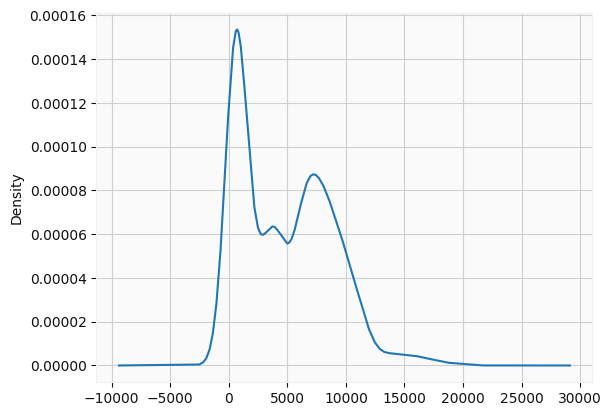

In [43]:
#kernel density
btc_day_copy['Close'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

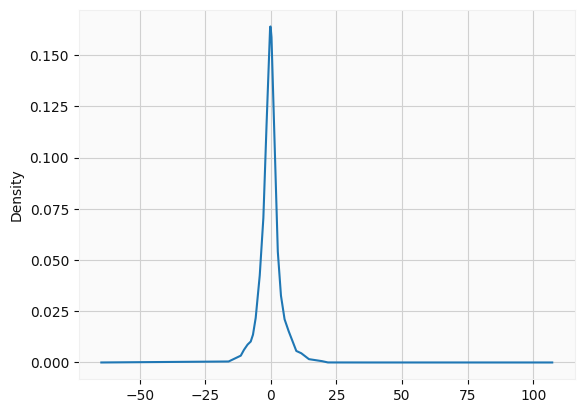

In [24]:
btc_day_copy['Return'].plot(kind='kde')

C:\Users\Sahil\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:>

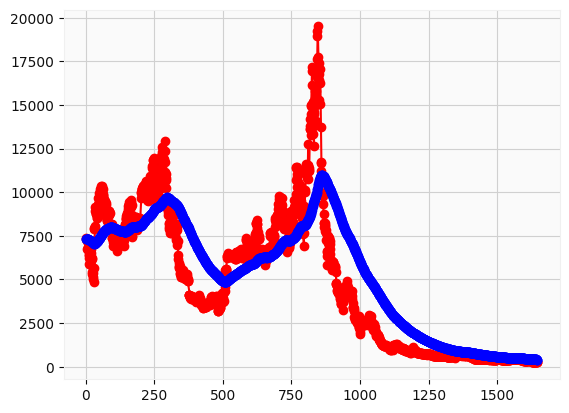

In [45]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(btc_day_copy['Close']).fit(smoothing_level=.01, optimized=False)
btc_day_copy['Close'].plot(marker = 'o', color='red')
model.fittedvalues.plot(marker = 'o', color = 'blue')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

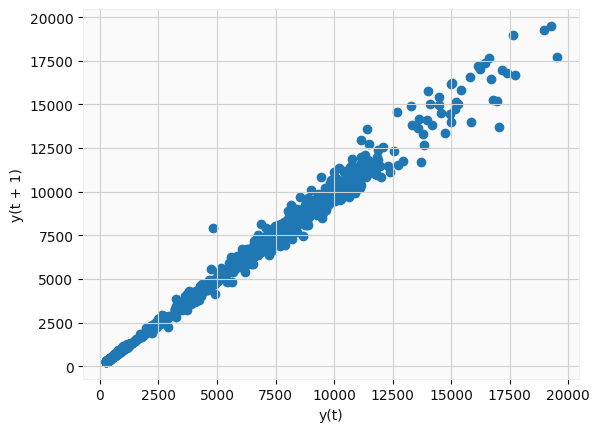

In [46]:
from pandas.plotting import lag_plot
lag_plot(btc_day_copy['Close'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

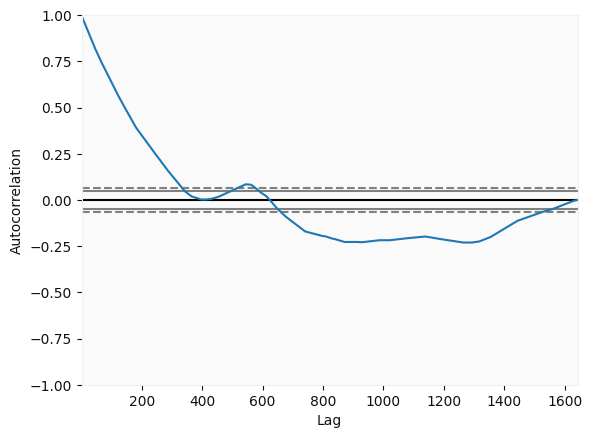

In [47]:
#Autocorrelation plot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(btc_day_copy['Close'])

In [25]:
btc_day_copy['Typical Price']=btc_day_copy[['High','Low','Close']].mean(axis = 1)
btc_day_copy.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Return,Typical Price
1,2020-04-09,BTCUSD,7369.60,7378.85,7115.04,7315.25,2237.13,16310014.53,NaN,7269.713333
2,2020-04-08,BTCUSD,7201.81,7432.23,7152.80,7369.60,2483.60,18138080.27,0.742968,7318.210000
3,2020-04-07,BTCUSD,7336.96,7468.42,7078.00,7201.81,2333.34,17047120.32,-2.276786,7249.410000
4,2020-04-06,BTCUSD,6775.21,7369.76,6771.01,7336.96,3727.47,26533750.17,1.876612,7159.243333
5,2020-04-05,BTCUSD,6870.20,6907.90,6678.60,6775.21,1275.49,8662210.80,-7.656441,6787.236667


In [49]:
Typical_price_mul_volbtc = btc_day_copy['Typical Price']*btc_day_copy['Volume BTC']
Total = Typical_price_mul_volbtc.sum()
SUM_VolumeBTC = btc_day_copy['Volume BTC'].sum()
VWAP = Total/SUM_VolumeBTC
VWAP

5632.878677883877

In [50]:
Typical_price_mul_volbtc

1       1.626329e+07
2       1.817551e+07
3       1.691534e+07
4       2.668586e+07
5       8.657052e+06
            ...     
1642    9.502372e+03
1643    3.035855e+03
1644    2.990575e+03
1645    7.633457e+03
1646    4.583753e+03
Length: 1643, dtype: float64

In [18]:
btc_day_date_index = btc_day_copy.set_index('Date')

In [52]:
candlestick = go.Candlestick(
   x = btc_day_date_index.index,
   open = btc_day_date_index['Open'],
   high = btc_day_date_index['High'],
   low = btc_day_date_index['Low'],
   close = btc_day_date_index['Close'])

fig = go.Figure(data = [candlestick])
fig.show()

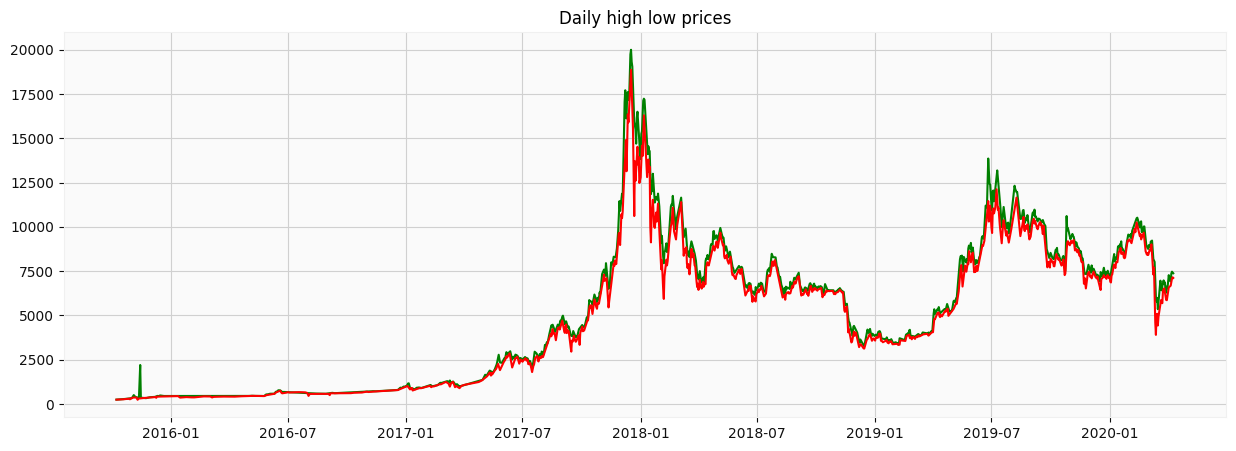

In [53]:
plt.figure (figsize=(15,5))
plt.plot(btc_day_date_index['High'], color='green')
# Plot the daily low price
plt.plot(btc_day_date_index['Low'], color='red')
plt.title('Daily high low prices')
plt.show()

In [54]:
# Resample from daily to weekly

btc_weekly = btc_day_date_index.resample('W').mean()
btc_weekly.head()

,Open,High,Low,Close,Volume BTC,Volume USD,Return,Typical Price
Date,,,,,,,,
2015-10-11,244.535000,247.692500,244.250000,246.285000,18.545000,4563.257500,-0.367872,246.075833
2015-10-18,256.031429,263.710000,254.200000,258.648571,175.141429,46461.315714,-1.347957,258.852857
2015-10-25,275.254286,281.348571,273.404286,278.242857,337.531429,93461.344286,-0.810194,277.665238
2015-11-01,306.202857,323.670000,293.718571,312.005714,939.355714,293904.180000,-3.321859,309.798095
2015-11-08,378.771429,417.978571,359.361429,385.485714,1708.240000,670326.267143,-0.407066,387.608571


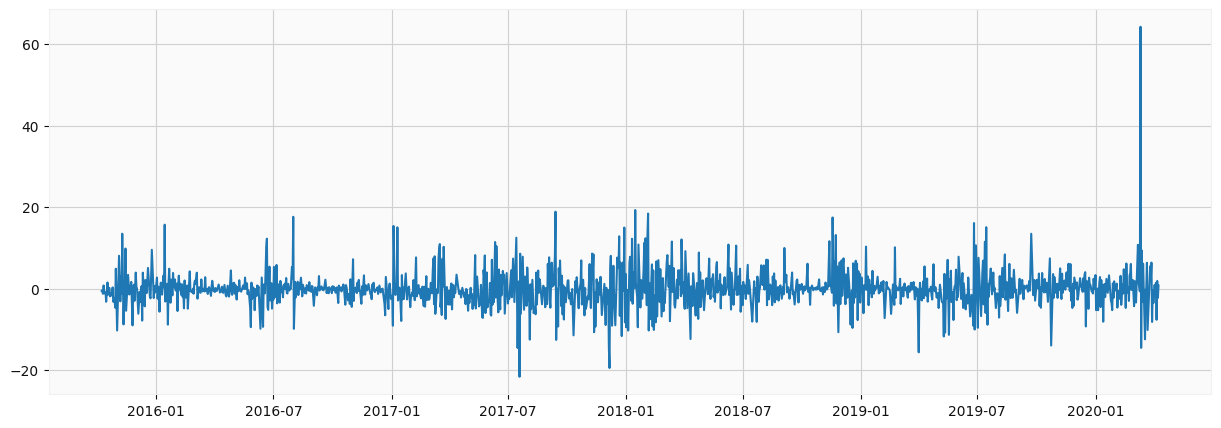

In [55]:
#DAILY RETURNS

plt.figure (figsize=(15,5))
plt.plot(btc_day_date_index['Return'])
plt.show()

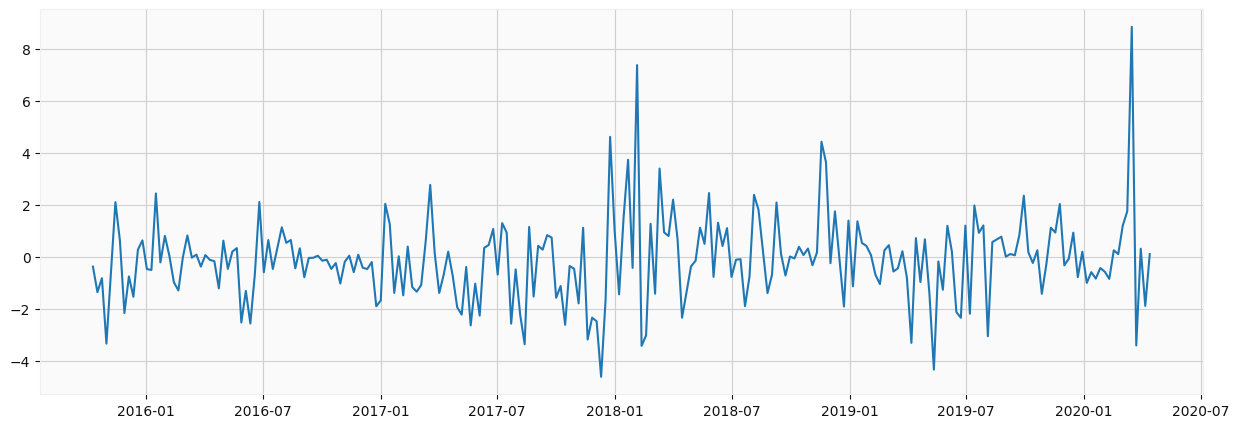

In [56]:
#WEEKLY RETURN

plt.figure (figsize=(15,5))
plt.plot(btc_weekly['Return'])
plt.show()

# DATA TRANSFORMATION
## SMA- Simple Moving Average
It is simply the arithmetic mean of the price over a specified period. The average is called "moving" because it is always calculated using the most recent n periods, and therefore moves along with the price on the chart.

In [57]:
fig1 = go.Figure(
        data = [
            go.Candlestick(
                x = btc_day_date_index.index,
                open = btc_day_date_index.Open,
                high = btc_day_date_index.High,
                low = btc_day_date_index.Low,
                close = btc_day_date_index.Close
            ),
            go.Scatter(
                x = btc_day_date_index.index, 
                y = btc_day_date_index.Close.rolling(window=20).mean(),
                mode = 'lines', 
                name = '20SMA',
                line = {'color': '#ff006a'}
            ),
            go.Scatter(
                x = btc_day_date_index.index, 
                y = btc_day_date_index.Close.rolling(window=50).mean(),
                mode = 'lines', 
                name = '50SMA',
                line = {'color': '#1900ff'}
            )
        ]
    )

fig1.update_layout(
    title = 'The Candlestick graph for BITCOIN',
    xaxis_title = 'Date',
    yaxis_title = 'Price CURRENCY',
    xaxis_rangeslider_visible = False
)
#fig1.update_yaxes(tickprefix='£')

fig1.show()

https://itnext.io/create-beautiful-cryptocurrency-graphs-in-python-bec7b9cbc21a

In [58]:
fig2 = go.Figure(
        data = [
            go.Scatter(
                x = btc_day_date_index.index, 
                y = btc_day_date_index.Close,
                mode = 'lines', 
                name = 'Close',
                line = {'color': '#006400'}
            ),
            go.Scatter(
                x = btc_day_date_index.index, 
                y = btc_day_date_index.Close.rolling(window=20).mean(),
                mode = 'lines', 
                name = '20SMA',
                line = {'color': '#ff006a'}
            ),
            go.Scatter(
                x = btc_day_date_index.index, 
                y = btc_day_date_index.Close.rolling(window=50).mean(),
                mode = 'lines', 
                name = '50SMA',
                line = {'color': '#1900ff'}
            )
        ]
    )

fig2.update_layout(
    #title = 'The Candlestick graph for BITCOIN',
    xaxis_title = 'Date',
    yaxis_title = 'Close',
    xaxis_rangeslider_visible = False
)
#fig1.update_yaxes(tickprefix='£')

fig2.show()

https://www.youtube.com/watch?v=PUk5E8G1r44
# SMA END

'''btc_day_sorted = btc_day.sort_index(by='Date', ascending = True)

'''btc_day_sorted_date = btc_day.sort_values(by = 'Date')
btc_day_sorted_date_index = btc_day_sorted_date.set_index('Date')
btc_day_sorted_date_index.head()

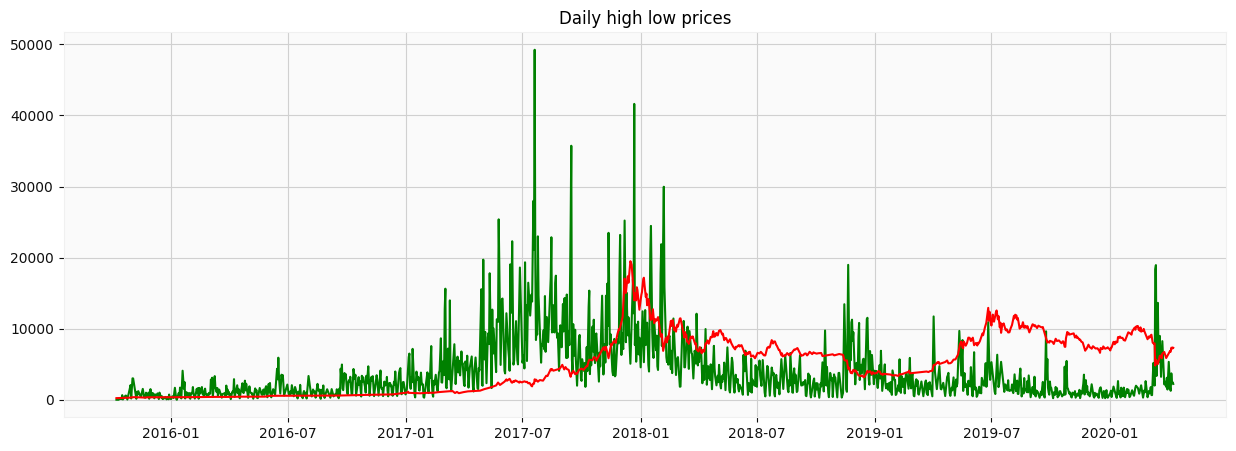

In [59]:
plt.figure (figsize=(15,5))
plt.plot(btc_day_date_index['Volume BTC'], color='green')
# Plot the daily low price
plt.plot(btc_day_date_index['Close'], color='red')
plt.title('Daily high low prices')
plt.show()

# TRENDLINE

In [60]:
btc_trendline_sorted = btc_day_copy.sort_values(by='Date')
btc_trendline = btc_trendline_sorted.set_index('Date')
btc_trendline.head()

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Return,Typical Price
Date,,,,,,,,,
2015-10-08,BTCUSD,242.50,245.00,242.5,243.95,18.80,4595.84,-0.586821,243.816667
2015-10-09,BTCUSD,243.95,249.97,243.6,245.39,30.99,7651.63,-0.369468,246.320000
2015-10-10,BTCUSD,245.39,246.30,244.6,246.30,12.17,2984.44,-1.282565,245.733333
2015-10-11,BTCUSD,246.30,249.50,246.3,249.50,12.22,3021.12,0.767367,248.433333
2015-10-12,BTCUSD,249.50,249.50,247.6,247.60,38.28,9493.89,-0.960000,248.233333


In [61]:
df1 = btc_trendline.copy()

In [62]:
df1_len = len(df1)
df1['Number'] = np.arange(df1_len)+1
df1_high = df1.copy()
df1_low = df1.copy()
df1.drop(['Symbol', 'Volume USD', 'Return', 'Typical Price'],axis = 1, inplace = True)
df1.tail()

,Open,High,Low,Close,Volume BTC,Number
Date,,,,,,
2020-04-05,6870.20,6907.90,6678.60,6775.21,1275.49,1639
2020-04-06,6775.21,7369.76,6771.01,7336.96,3727.47,1640
2020-04-07,7336.96,7468.42,7078.00,7201.81,2333.34,1641
2020-04-08,7201.81,7432.23,7152.80,7369.60,2483.60,1642
2020-04-09,7369.60,7378.85,7115.04,7315.25,2237.13,1643


In [63]:
while len(df1_high)>2:
    slope, intercept, r_value, p_value, std_err = linregress(x=df1_high['Number'], y=df1_high['High'])
    df1_high = df1_high.loc[df1_high['High'] > slope * df1_high['Number'] + intercept]
    
df1_high.drop(['Symbol', 'Volume USD', 'Return', 'Typical Price'],axis = 1, inplace = True)
df1_high.tail()

,Open,High,Low,Close,Volume BTC,Number
Date,,,,,,
2017-12-17,19499.99,19999.0,18870.0,19260.5,5561.4,801


In [64]:
while len(df1_low)>2:
    slope, intercept, r_value, p_value, std_err = linregress(x=df1_low['Number'], y=df1_low['Low'])
    df1_low = df1_low.loc[df1_low['Low'] < slope * df1_low['Number'] + intercept]
    
df1_low.drop(['Symbol', 'Volume USD', 'Return', 'Typical Price'],axis = 1, inplace = True)
df1_low.tail()

,Open,High,Low,Close,Volume BTC,Number
Date,,,,,,
2017-03-25,936.83,978.6,892.12,966.76,3976.56,535


In [65]:
slope, intercept, r_value, p_value, std_err = linregress(x=df1_high['Number'], y=df1_high['Close'])
df1['Uptrend'] = slope * df1['Number'] + intercept
df1

C:\Users\Sahil\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Sahil\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\Sahil\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning:

invalid value encountered in double_scalars



,Open,High,Low,Close,Volume BTC,Number,Uptrend
Date,,,,,,,
2015-10-08,242.50,245.00,242.50,243.95,18.80,1,NaN
2015-10-09,243.95,249.97,243.60,245.39,30.99,2,NaN
2015-10-10,245.39,246.30,244.60,246.30,12.17,3,NaN
2015-10-11,246.30,249.50,246.30,249.50,12.22,4,NaN
2015-10-12,249.50,249.50,247.60,247.60,38.28,5,NaN
...,...,...,...,...,...,...,...
2020-04-05,6870.20,6907.90,6678.60,6775.21,1275.49,1639,NaN
2020-04-06,6775.21,7369.76,6771.01,7336.96,3727.47,1640,NaN
2020-04-07,7336.96,7468.42,7078.00,7201.81,2333.34,1641,NaN


In [66]:
slope, intercept, r_value, p_value, std_err = linregress(x=df_low['Number'], y=df_low['Close'])
df['Downtrend'] = slope * df['Number'] + intercept
df.tail()

NameError: name 'df_low' is not defined

# TRENDLINE END

In [67]:
btc_min

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2020-04-09 00:00:00,1586390400000,BTCUSD,7369.60,7369.60,7348.47,7350.41,7.733528
2020-04-08 23:59:00,1586390340000,BTCUSD,7364.37,7369.60,7364.37,7369.60,1.310954
2020-04-08 23:58:00,1586390280000,BTCUSD,7360.89,7367.18,7360.89,7364.37,1.018774
2020-04-08 23:57:00,1586390220000,BTCUSD,7357.62,7366.12,7357.62,7360.89,0.026251
2020-04-08 23:56:00,1586390160000,BTCUSD,7370.71,7370.71,7357.62,7357.62,0.444867
...,...,...,...,...,...,...,...
2015-10-08 13:44:00,1444311840,BTCUSD,242.96,242.96,242.96,242.96,0.033491
2015-10-08 13:43:00,1444311780,BTCUSD,242.95,242.96,242.95,242.96,0.010000
2015-10-08 13:42:00,1444311720,BTCUSD,242.95,242.95,242.95,242.95,0.000000


In [68]:
btc_min.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2283519 entries, 2020-04-09 00:00:00 to 2015-10-08 13:40:00
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unix Timestamp  int64  
 1   Symbol          object 
 2   Open            float64
 3   High            float64
 4   Low             float64
 5   Close           float64
 6   Volume          float64
dtypes: float64(5), int64(1), object(1)
memory usage: 139.4+ MB


In [69]:
btc_min_copy = btc_min.copy()
btc_min_copy.drop(['Unix Timestamp', 'Symbol'],axis = 1, inplace = True)
btc_min_copy.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-09 00:00:00,7369.60,7369.60,7348.47,7350.41,7.733528
2020-04-08 23:59:00,7364.37,7369.60,7364.37,7369.60,1.310954
2020-04-08 23:58:00,7360.89,7367.18,7360.89,7364.37,1.018774
2020-04-08 23:57:00,7357.62,7366.12,7357.62,7360.89,0.026251
2020-04-08 23:56:00,7370.71,7370.71,7357.62,7357.62,0.444867


In [70]:
btc_min_copy.dropna()

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-09 00:00:00,7369.60,7369.60,7348.47,7350.41,7.733528
2020-04-08 23:59:00,7364.37,7369.60,7364.37,7369.60,1.310954
2020-04-08 23:58:00,7360.89,7367.18,7360.89,7364.37,1.018774
2020-04-08 23:57:00,7357.62,7366.12,7357.62,7360.89,0.026251
2020-04-08 23:56:00,7370.71,7370.71,7357.62,7357.62,0.444867
...,...,...,...,...,...
2015-10-08 13:44:00,242.96,242.96,242.96,242.96,0.033491
2015-10-08 13:43:00,242.95,242.96,242.95,242.96,0.010000
2015-10-08 13:42:00,242.95,242.95,242.95,242.95,0.000000


In [71]:
btc_min_copy.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2015-10-08 13:44:00,242.96,242.96,242.96,242.96,0.033491
2015-10-08 13:43:00,242.95,242.96,242.95,242.96,0.010000
2015-10-08 13:42:00,242.95,242.95,242.95,242.95,0.000000
2015-10-08 13:41:00,242.50,242.95,242.50,242.95,0.001000
2015-10-08 13:40:00,0.00,242.50,0.00,242.50,0.050000


In [72]:
v = btc_min_copy['Volume'].values
tp = (btc_min_copy['Low'] + btc_min_copy['Close'] + btc_min_copy['High']).div(3).values
btc_min_copy = btc_min_copy.assign(vwap=(tp * v).cumsum() / v.cumsum())

fig3 = go.Figure(data=[go.Candlestick(x=btc_min_copy.index,
                open=btc_min_copy['Open'],
                high=btc_min_copy['High'],
                low=btc_min_copy['Low'],
                close=btc_min_copy['Close'],name='Bitcoin')])

fig3.add_trace(go.Scatter(
    x=btc_min_copy.index,
    y=btc_min_copy['vwap'],
    mode='lines',
    name='vwap', 
    line=dict(color='royalblue',width=2)
))

fig3.update_layout(
    height=600
)
fig3.show()

In [5]:
min = pd.read_csv(r"C:\Users\Sahil\Desktop\IITP\VScode\Bitcoin\BTCUSD_1min.csv")
min.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7348.47,7350.41,7.733528
1,1586390340000,2020-04-08 23:59:00,BTCUSD,7364.37,7369.60,7364.37,7369.60,1.310954
2,1586390280000,2020-04-08 23:58:00,BTCUSD,7360.89,7367.18,7360.89,7364.37,1.018774
3,1586390220000,2020-04-08 23:57:00,BTCUSD,7357.62,7366.12,7357.62,7360.89,0.026251
4,1586390160000,2020-04-08 23:56:00,BTCUSD,7370.71,7370.71,7357.62,7357.62,0.444867


In [6]:
min.index = pd.DatetimeIndex(min['Date'])
min.drop(['Unix Timestamp','Symbol','Date'],axis = 1, inplace = True)
v = min['Volume'].values
tp = (min['Low'] + min['Close'] + min['High']).div(3).values
min = min.assign(vwap=(tp * v).cumsum() / v.cumsum())
min

,Open,High,Low,Close,Volume,vwap
Date,,,,,,
2020-04-09 00:00:00,7369.60,7369.60,7348.47,7350.41,7.733528,7356.160000
2020-04-08 23:59:00,7364.37,7369.60,7364.37,7369.60,1.310954,7357.855376
2020-04-08 23:58:00,7360.89,7367.18,7360.89,7364.37,1.018774,7358.492288
2020-04-08 23:57:00,7357.62,7366.12,7357.62,7360.89,0.026251,7358.500226
2020-04-08 23:56:00,7370.71,7370.71,7357.62,7357.62,0.444867,7358.647317
...,...,...,...,...,...,...
2015-10-08 13:44:00,242.96,242.96,242.96,242.96,0.033491,5608.829538
2015-10-08 13:43:00,242.95,242.96,242.95,242.96,0.010000,5608.829529
2015-10-08 13:42:00,242.95,242.95,242.95,242.95,0.000000,5608.829529


In [7]:
tdf = min.loc['2020-04-08',:]
tdf

,Open,High,Low,Close,Volume,vwap
Date,,,,,,
2020-04-08 23:59:00,7364.37,7369.60,7364.37,7369.60,1.310954,7357.855376
2020-04-08 23:58:00,7360.89,7367.18,7360.89,7364.37,1.018774,7358.492288
2020-04-08 23:57:00,7357.62,7366.12,7357.62,7360.89,0.026251,7358.500226
2020-04-08 23:56:00,7370.71,7370.71,7357.62,7357.62,0.444867,7358.647317
2020-04-08 23:55:00,7370.61,7370.71,7367.12,7370.71,0.000060,7358.647379
...,...,...,...,...,...,...
2020-04-08 00:04:00,7193.98,7196.90,7190.92,7193.00,0.000086,7303.554401
2020-04-08 00:03:00,7194.22,7202.03,7193.15,7193.98,0.222496,7303.544829
2020-04-08 00:02:00,7209.93,7209.93,7194.22,7194.22,0.046740,7303.542876


C:\Users\Sahil\AppData\Roaming\Python\Python310\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


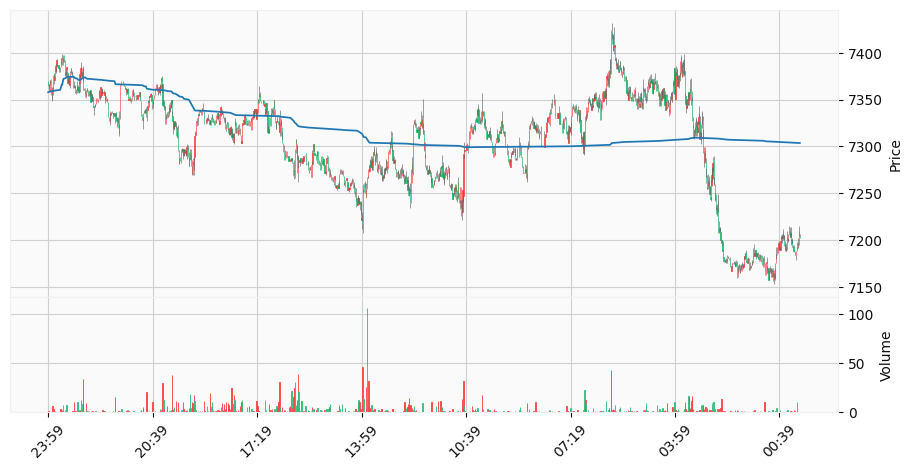

In [8]:
import mplfinance as mpf

adp = mpf.make_addplot(tdf['vwap'], type='line')
mpf.plot(tdf, figratio=(8,4), type='candle', addplot=adp, volume=True, style='yahoo')

In [9]:
btc_hr

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7338.23,7338.23,7.788915
1,1586386800000,2020-04-08 23:00:00,BTCUSD,7367.28,7398.92,7348.47,7369.60,66.558293
2,1586383200000,2020-04-08 22:00:00,BTCUSD,7337.19,7390.25,7322.87,7367.28,88.486108
3,1586379600000,2020-04-08 21:00:00,BTCUSD,7327.70,7370.00,7311.33,7337.19,35.551553
4,1586376000000,2020-04-08 20:00:00,BTCUSD,7320.11,7375.72,7313.66,7327.70,153.655811
...,...,...,...,...,...,...,...,...
39460,1444323600,2015-10-08 17:00:00,BTCUSD,244.25,244.99,244.02,244.99,3.920632
39461,1444320000,2015-10-08 16:00:00,BTCUSD,244.92,244.92,244.25,244.25,3.895252
39462,1444316400,2015-10-08 15:00:00,BTCUSD,245.00,245.00,244.92,244.92,3.016926
39463,1444312800,2015-10-08 14:00:00,BTCUSD,245.00,245.00,244.50,245.00,4.453649


In [10]:
btc_hr.index = pd.DatetimeIndex(btc_hr['Date'])
btc_hr.drop(['Unix Timestamp','Symbol','Date'],axis = 1, inplace = True)
v = btc_hr['Volume'].values
tp = (btc_hr['Low'] + btc_hr['Close'] + btc_hr['High']).div(3).values
btc_hr = btc_hr.assign(vwap=(tp * v).cumsum() / v.cumsum())
btc_hr

,Open,High,Low,Close,Volume,vwap
Date,,,,,,
2020-04-09 00:00:00,7369.60,7369.60,7338.23,7338.23,7.788915,7348.686667
2020-04-08 23:00:00,7367.28,7398.92,7348.47,7369.60,66.558293,7369.853028
2020-04-08 22:00:00,7337.19,7390.25,7322.87,7367.28,88.486108,7364.571198
2020-04-08 21:00:00,7327.70,7370.00,7311.33,7337.19,35.551553,7360.079509
2020-04-08 20:00:00,7320.11,7375.72,7313.66,7327.70,153.655811,7350.890538
...,...,...,...,...,...,...
2015-10-08 17:00:00,244.25,244.99,244.02,244.99,3.920632,5618.114200
2015-10-08 16:00:00,244.92,244.92,244.25,244.25,3.895252,5618.110851
2015-10-08 15:00:00,245.00,245.00,244.92,244.92,3.016926,5618.108258


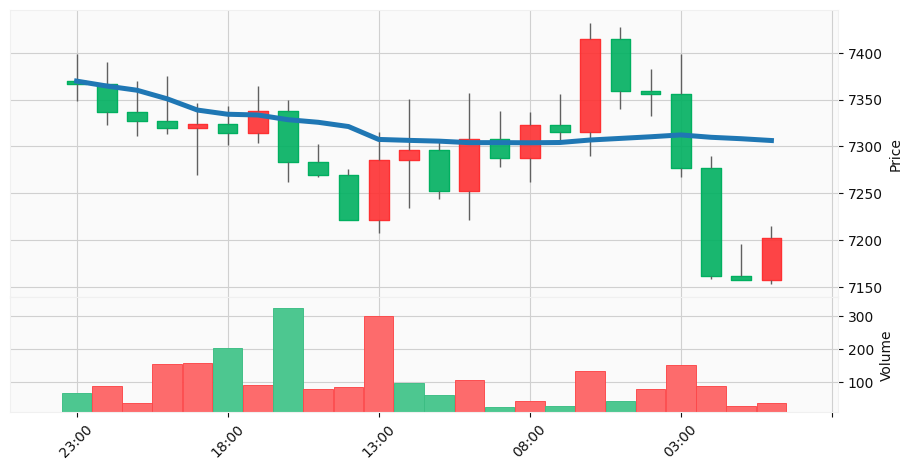

In [11]:
hr = btc_hr.loc['2020-04-08',:]
adp = mpf.make_addplot(hr['vwap'], type='line')
mpf.plot(hr, figratio=(8,4), type='candle', addplot=adp, volume=True, style='yahoo')

In [19]:
btc_day_date_index

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Return
Date,,,,,,,,
2020-04-09,BTCUSD,7369.60,7378.85,7115.04,7315.25,2237.13,16310014.53,NaN
2020-04-08,BTCUSD,7201.81,7432.23,7152.80,7369.60,2483.60,18138080.27,0.742968
2020-04-07,BTCUSD,7336.96,7468.42,7078.00,7201.81,2333.34,17047120.32,-2.276786
2020-04-06,BTCUSD,6775.21,7369.76,6771.01,7336.96,3727.47,26533750.17,1.876612
2020-04-05,BTCUSD,6870.20,6907.90,6678.60,6775.21,1275.49,8662210.80,-7.656441
...,...,...,...,...,...,...,...,...
2015-10-12,BTCUSD,249.50,249.50,247.60,247.60,38.28,9493.89,-0.960000
2015-10-11,BTCUSD,246.30,249.50,246.30,249.50,12.22,3021.12,0.767367
2015-10-10,BTCUSD,245.39,246.30,244.60,246.30,12.17,2984.44,-1.282565


In [20]:
import matplotlib.dates as mdates
import mpl_finance
from mpl_finance import plot_day_summary_ohlc, volume_overlay

AttributeError: module 'mplfinance' has no attribute 'plot_day_summary_ohlc'

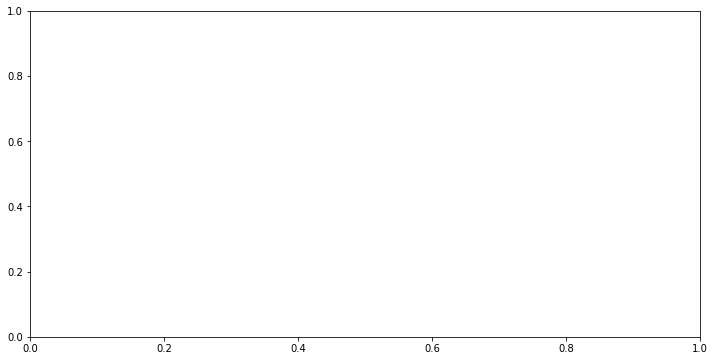

In [23]:
hsma40 = btc_day_date_index['High'].rolling(40).mean()
lsma40 = btc_day_date_index['Low'].rolling(40).mean()
ema15 = btc_day_date_index['Close'].ewm(span=15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mpf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('SPDR S&P 500 ETF Trust - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()